<a href="https://colab.research.google.com/github/rush026/GitHub-intelij/blob/main/magic_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
cols=['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
df=pd.read_csv('/content/magic04.data',names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
df["class"]=(df["class"]=="g").astype(int)

In [4]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


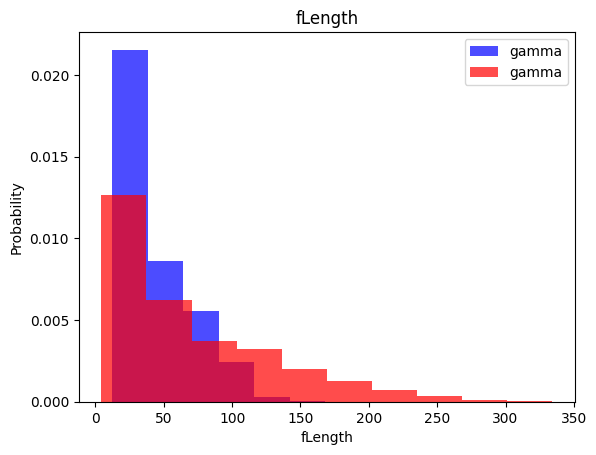

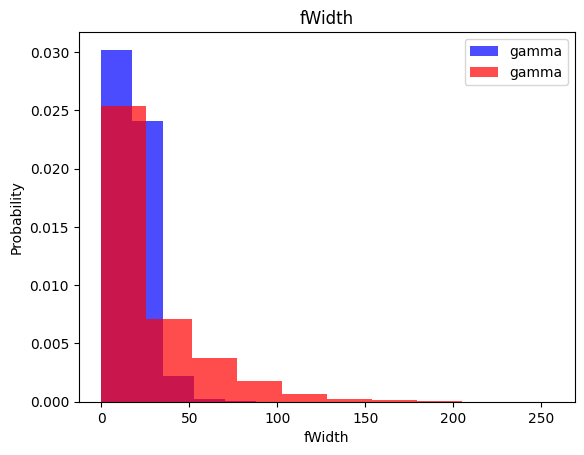

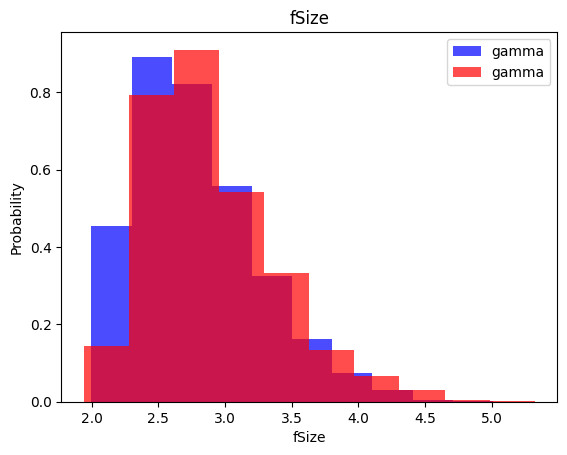

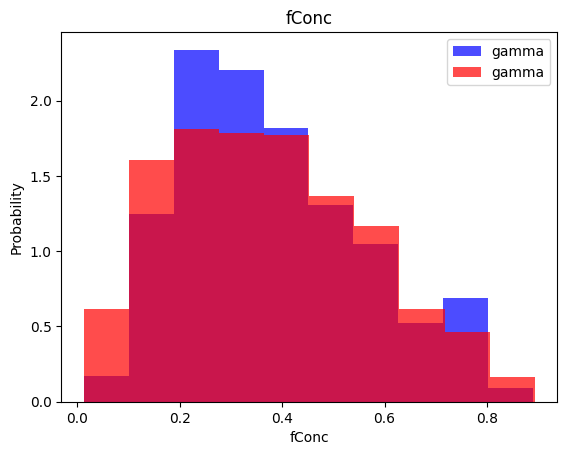

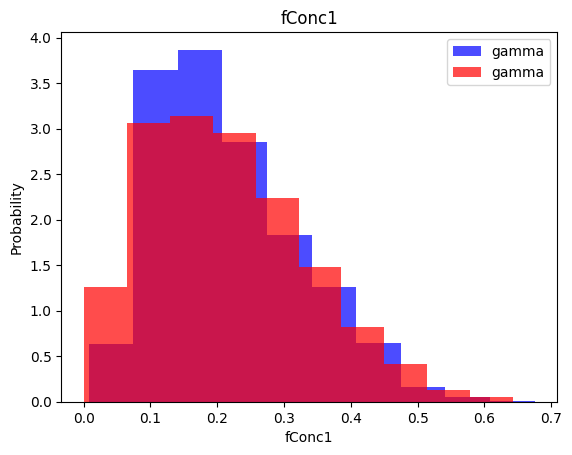

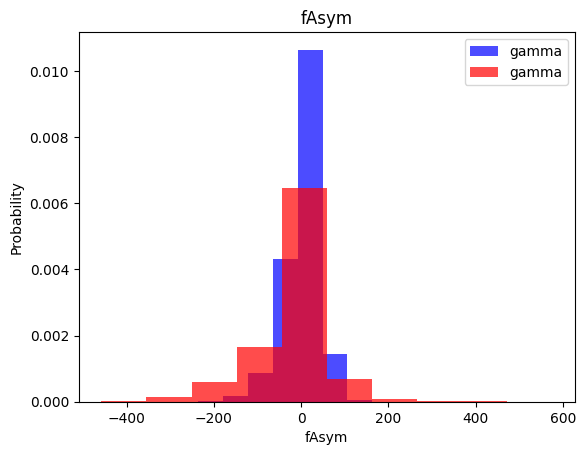

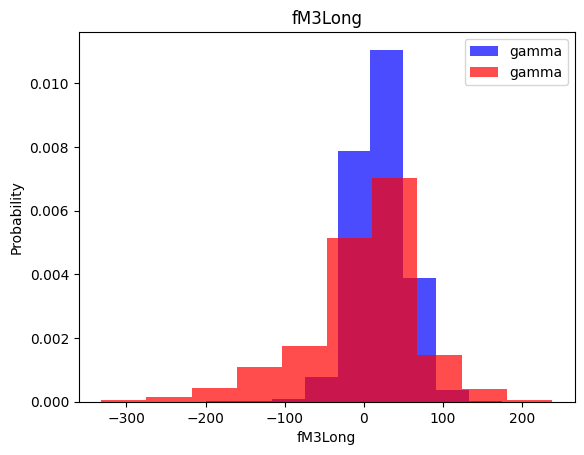

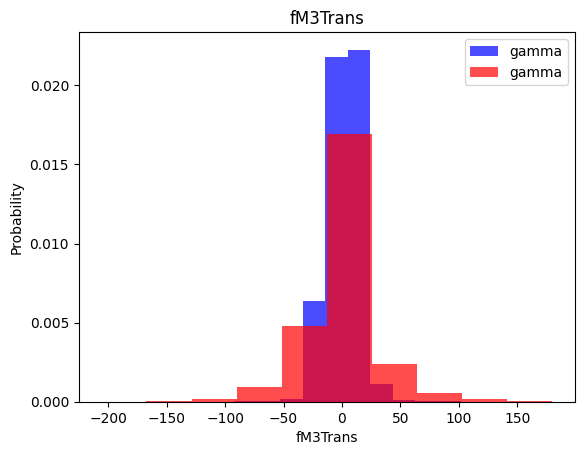

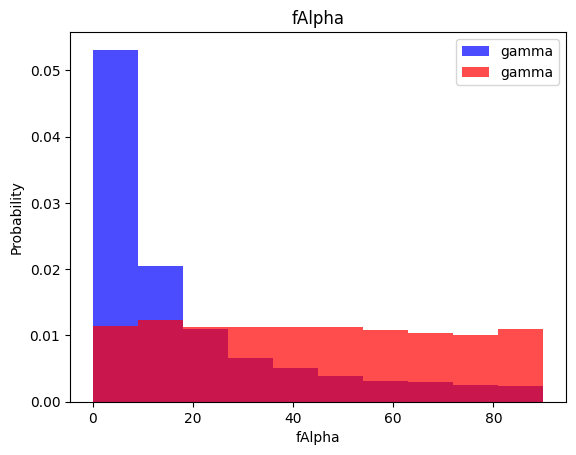

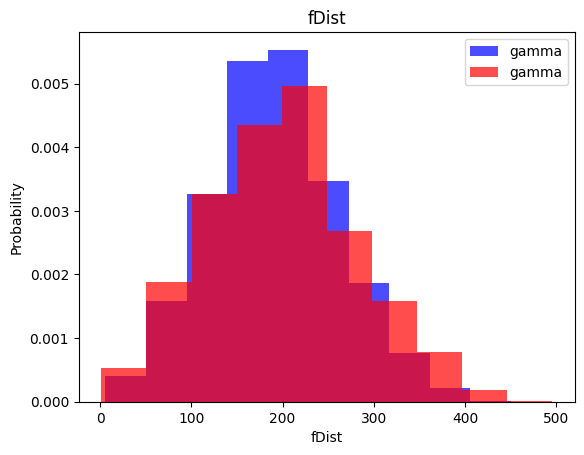

In [5]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label],color='blue',label='gamma',alpha=0.7,density=True)
  plt.hist(df[df["class"]==0][label],color='red',label='gamma',alpha=0.7,density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()


In [6]:
train,valid,test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [7]:
def scale_dataset(dataframe,over_sampling=False):
  x=dataframe[dataframe.columns[:-1]].values
  y=dataframe[dataframe.columns[-1]].values

  scaler=StandardScaler()
  x=scaler.fit_transform(x)
  if over_sampling:
    ros=RandomOverSampler()
    x,y=ros.fit_resample(x,y)

  data=np.hstack((x,np.reshape(y,(-1, 1))))
  return data,x,y

In [8]:
train,x_train,y_train=scale_dataset(train,over_sampling=True)
valid,x_train,y_train=scale_dataset(valid,over_sampling=False)
test,x_train,y_train=scale_dataset(test,over_sampling=False)

KNN


In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [10]:
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [11]:
y_pred=knn_model.predict(x_train)
print(classification_report(y_train,y_pred))


              precision    recall  f1-score   support

           0       0.91      0.69      0.79      1368
           1       0.85      0.96      0.90      2436

    accuracy                           0.87      3804
   macro avg       0.88      0.83      0.84      3804
weighted avg       0.87      0.87      0.86      3804



naive bayes


In [12]:
from sklearn.naive_bayes import GaussianNB

In [13]:
nb_model=GaussianNB()
nb_model=nb_model.fit(x_train,y_train)

In [14]:
y_pred=nb_model.predict(x_train)
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.38      0.50      1368
           1       0.72      0.92      0.81      2436

    accuracy                           0.72      3804
   macro avg       0.72      0.65      0.65      3804
weighted avg       0.72      0.72      0.70      3804



logistic regression

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
lg_model=LogisticRegression()
lg_model=lg_model.fit(x_train,y_train)

In [17]:
y_pred=lg_model.predict(x_train)
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.58      0.65      1368
           1       0.79      0.89      0.84      2436

    accuracy                           0.78      3804
   macro avg       0.77      0.73      0.74      3804
weighted avg       0.77      0.78      0.77      3804



SVM

In [18]:
from sklearn.svm import SVC

In [19]:
svm_model=SVC()
svm_model=svm_model.fit(x_train,y_train)

In [20]:
y_pred=svm_model.predict(x_train)
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1368
           1       0.85      0.96      0.90      2436

    accuracy                           0.87      3804
   macro avg       0.88      0.83      0.85      3804
weighted avg       0.87      0.87      0.86      3804



neural network

In [21]:
import tensorflow as tf

In [28]:
def plot_loss(history):
  fig=plt.figure()
  plt.plot(history.history['loss'],label='loss')
  plt.plot(history.history['val_loss'],label='val_loss')
  plt.legend()
  plt.show()

def plot_acc(history):
  fig=plt.figure()
  plt.plot(history.history['accuracy'],label='accuracy')
  plt.plot(history.history['val_accuracy'],label='val_accuracy')
  plt.legend()
  plt.show()

In [30]:
nn_model=tf.keras.Sequential([
       tf.keras.layers.Dense(32,activation='relu',input_shape=(10,)),
       tf.keras.layers.Dense(32,activation='relu'),
       tf.keras.layers.Dense(1,activation='sigmoid')
 ])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
history=nn_model.fit(

     x_train,y_train,epochs=100,batch_size=32,validation_split=0.2,verbose=0
     )

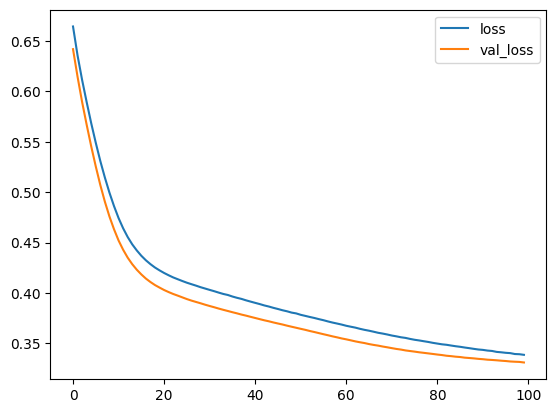

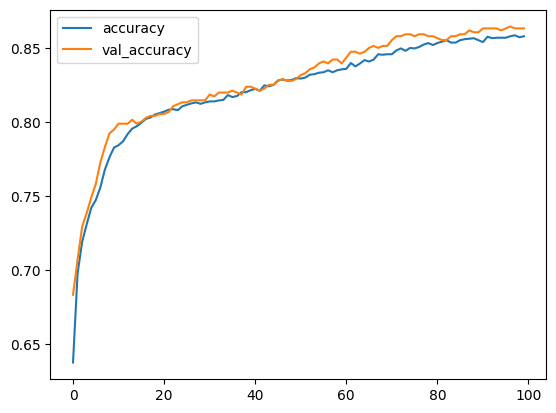

In [32]:
plot_loss(history)
plot_acc(history)